<a href="https://colab.research.google.com/github/adityaras/Aditya_2018273_RL-M2020/blob/master/HW3/RL_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import copy


## Q4

In [ ]:
card_value = {"K":10,"Q":10,"J":10,"A":[11,1]}
for i in range(2,11):
  card_value[i] = i
# print(len(card_value))

In [ ]:
def draw_card():
  card_ind = random.randint(1,14)
  if card_ind == 1:
    return  "A"
  if card_ind == 2:
    return  "K"
  if card_ind == 3:
    return  "Q"
  if card_ind == 4:
    return  "J"
  return card_ind

## Q6

In [105]:
actions = [-1,1]
term = 1/6
true_val = [0,term, 2*term, 0.5, 4*term, 5*term,0]
# print(q_star)

In [66]:
def next_step(state, action):
  state = state + action
  if state == 6:
    return state, 1
  else:
    return state, 0

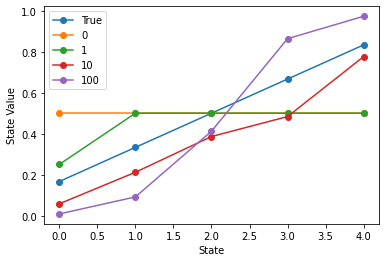

In [72]:
state_value=np.zeros(7)
for i in range(1,len(state_value)-1):
  state_value[i] = 0.5
alphas = [0.1,0.15,0.05]
plt.plot(true_val, label = "True",marker="o")

for a in alphas:
  for ep in range(101):
    curr_state=len(state_value)//2
    if ep in [0,1,10,100] and a == 0.1:
      plt.plot(state_value[1:6], label = ep, marker = "o")
    while(True):

      action =  np.random.choice(actions)    
      next_state, reward=next_step(curr_state,action)
      state_value[curr_state]+=alpha*(state_value[next_state]+reward-state_value[curr_state])
      curr_state = copy.deepcopy(next_state)
      
      if curr_state == 6 or curr_state == 0:
        break

plt.xlabel('State')
plt.ylabel('State Value')
plt.legend(loc="best")         
plt.show()

In [109]:
state_value=np.zeros(7)
for i in range(1,len(state_value)-1):
  state_value[i] = 0.5
alphas = [0.1,0.15,0.05]
rms = {}
for a in alphas:
  estimates=np.zeros(101)
  for _ in range(100):
    state_value=np.zeros(7)
    for i in range(1,len(state_value)-1):
      state_value[i] = 0.5
    for ep in range(101):
      curr_state=len(state_value)//2
      while(True):
        action =  np.random.choice(actions)    
        next_state, reward=next_step(curr_state,action)
        state_value[curr_state]+=alpha*(state_value[next_state]+reward-state_value[curr_state])
        curr_state = copy.deepcopy(next_state)
        if curr_state == 6 or curr_state == 0:
          break
      estimates[ep] += np.sqrt(np.sum(np.power(state_value-true_val,2)))
  rms[a] = estimates/100

In [152]:
state_value=np.zeros(7)
for i in range(1,len(state_value)-1):
  state_value[i] = 0.5
alphas_list = [0.01,0.02,0.03,0.04]
rms2 = {}
for a in alphas_list:
  estimates=np.zeros(101)
  for _ in range(100):
    # state_value=np.zeros(7)
    for i in range(1,len(state_value)-1):
      state_value[i] = 0.5
    for ep in range(101):
      curr_state=len(state_value)//2
      visited_states = []
      visited_states.append(curr_state)
      while(True):
        action =  np.random.choice(actions)    
        next_state, reward=next_step(curr_state,action)
        
        curr_state  = copy.deepcopy(next_state)
        visited_states.append(curr_state)
        
        if curr_state == 6 or curr_state == 0:
          break

      for s in visited_states:
        state_value[s] += a*(reward - state_value[s])
        
      estimates[ep] += np.sqrt(np.sum(np.power(state_value[1:6]-true_val[1:6],2)))    

  rms2[a] = estimates/100

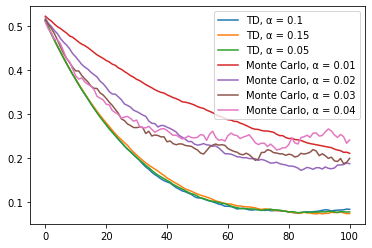

In [153]:
for l in rms:
    plt.plot(rms[l],label = 'TD, \u03B1 = '+str(l))
for k in rms2:
    plt.plot(rms2[k],label = 'Monte Carlo, \u03B1 = '+str(k))
plt.legend()
plt.show()

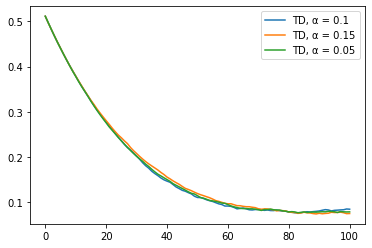

In [154]:
for l in rms:
    plt.plot(rms[l],label = 'TD, \u03B1 = '+str(l))
plt.legend()
plt.show()

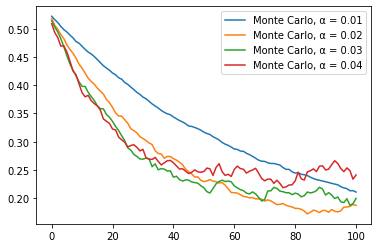

In [155]:
for k in rms2:
    plt.plot(rms2[k],label = 'Monte Carlo, \u03B1 = '+str(k))
plt.legend()
plt.show()

## Q7
